In [1]:
import gensim
import spacy
import sklearn
import pandas as pd
import numpy as np
from platform import python_version

C:\ProgramData\Anaconda3\envs\spacy-env\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Make sure the packages used are these version numbers or higher. 
print("Gensim version: ",gensim.__version__)
print("Sklearn version: ", sklearn.__version__)
print("Spacy version: ", spacy.__version__)
print("Pandas version: ",pd.__version__)
print("Numpy version: ", np.__version__)
print("Python version: ", python_version())

Gensim version:  3.5.0
Sklearn version:  0.20.2
Spacy version:  2.0.18
Pandas version:  0.23.4
Numpy version:  1.15.4
Python version:  3.6.6


In [2]:
# Listing 4-1
import requests
import json
url = 'https://hunter.io/trial/v2/domain-search?limit=10&offset=0&domain=jaympatel.com&format=json'
r = requests.get(url)
html_response = r.text
json.loads(html_response)

{'data': {'accept_all': False,
  'country': None,
  'disposable': False,
  'domain': 'jaympatel.com',
  'emails': [{'confidence': 94,
    'department': 'it',
    'first_name': 'Jay',
    'last_name': 'Patel',
    'linkedin': 'https://www.linkedin.com/in/jay-m-patel-engg',
    'phone_number': None,
    'position': 'Freelance Software Developer',
    'seniority': None,
    'sources': [{'domain': 'leanpub.com',
      'extracted_on': '2019-09-25',
      'last_seen_on': '2020-03-25',
      'still_on_page': True,
      'uri': 'http://leanpub.com/getting-structured-data-from-internet-web-scraping-and-rest-apis/email_author/new'},
     {'domain': 'leanpub.com',
      'extracted_on': '2019-09-04',
      'last_seen_on': '2020-05-11',
      'still_on_page': True,
      'uri': 'http://leanpub.com/u/jaympatel'},
     {'domain': 'jaympatel.com',
      'extracted_on': '2019-04-24',
      'last_seen_on': '2020-04-01',
      'still_on_page': True,
      'uri': 'http://jaympatel.com/cv'},
     {'domain'

In [14]:
# Listing 4-2

temp_dict = json.loads(html_response)
print("email: ", temp_dict["data"]["emails"][0]["value"])
print("\nsource urls:\n")
for i in range(len(temp_dict["data"]['emails'][0]["sources"])):
    print(temp_dict["data"]['emails'][0]["sources"][i]["uri"])

email:  j**@jaympatel.com

source urls:

http://leanpub.com/getting-structured-data-from-internet-web-scraping-and-rest-apis/email_author/new
http://leanpub.com/u/jaympatel
http://jaympatel.com/cv
http://jaympatel.com/consulting-services
http://leanpub.com/getting-structured-data-from-internet-web-scraping-and-rest-apis
http://jaympatel.com/about
http://jaympatel.com


In [1]:
# Listing 4-3

import numpy as np
import pandas as pd

#df = pd.read_csv("us_fda_url.csv")
df = pd.read_csv("warning_letters_table.csv")
df.head()
fetch_list = []
for i in range(len(df["path"])):
    temp_url = "https://www.fda.gov" + df["path"].iloc[i]
    fetch_list.append(temp_url)

In [5]:
# Listing 4-3 (cont.)

import re
import requests
import tld
import time
def extract_emails(html_res,url, email_list):
    
    reg = re.compile("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)")
    email_match = reg.findall(html_res)
    for email in email_match:
        potential_tld = "http://"+email.split('@')[1]
        
        try:
            res = tld.get_tld(potential_tld)
        except:
            continue
        
        temp_dict = {}
        temp_dict["email"] = email
        temp_dict["url"] = url
        email_list.append(temp_dict)
    return email_list

def fetch_pages(email_list, url_list):
    total_urls = len(url_list)
    i = 0
    for url in url_list:
        i = i +1
        time.sleep(1)
        r = requests.get(url)
        if r.status_code == 200:
            
            html_response = r.text
            email_list = extract_emails(html_response,url, email_list)
            print("fetched " + str(i) + " out of total " + str(total_urls) + " pages")
        else:
            continue
    return email_list

25

In [6]:
email_list = []
email_list = fetch_pages(email_list, fetch_list[:30])
df_emails = pd.DataFrame(email_list)
df_emails.email = df_emails.email.str.lower()
df_emails = df_emails.drop_duplicates(subset = ["email","url"])
df_emails.head(5)

fetched 1 out of total 30 pages
fetched 2 out of total 30 pages
fetched 3 out of total 30 pages
fetched 4 out of total 30 pages
fetched 5 out of total 30 pages
fetched 6 out of total 30 pages
fetched 7 out of total 30 pages
fetched 8 out of total 30 pages
fetched 9 out of total 30 pages
fetched 10 out of total 30 pages
fetched 11 out of total 30 pages
fetched 12 out of total 30 pages
fetched 13 out of total 30 pages
fetched 14 out of total 30 pages
fetched 15 out of total 30 pages
fetched 16 out of total 30 pages
fetched 17 out of total 30 pages
fetched 18 out of total 30 pages
fetched 19 out of total 30 pages
fetched 20 out of total 30 pages
fetched 21 out of total 30 pages
fetched 22 out of total 30 pages
fetched 23 out of total 30 pages
fetched 24 out of total 30 pages
fetched 25 out of total 30 pages
fetched 26 out of total 30 pages
fetched 27 out of total 30 pages
fetched 28 out of total 30 pages
fetched 29 out of total 30 pages
fetched 30 out of total 30 pages


,email,url
0,lynn.bonner@fda.hhs.gov,https://www.fda.gov/inspections-compliance-enf...
2,feb@fda.hhs.gov,https://www.fda.gov/inspections-compliance-enf...
4,alan@thepipeshop.co.uk,https://www.fda.gov/inspections-compliance-enf...
5,ctpcompliance@fda.hhs.gov,https://www.fda.gov/inspections-compliance-enf...
7,abuse@webfusion.com,https://www.fda.gov/inspections-compliance-enf...


In [8]:
# Listing 4-4

import time
import re
for n in range(20,30):
    time_i = time.time()
    s = 'x'*n
    pat = re.compile('(x+)+y')
    re_mat = pat.match(s)
    time_t = time.time()
    print("total time taken: ", time_t-time_i,s)


total time taken:  0.048684120178222656 xxxxxxxxxxxxxxxxxxxx
total time taken:  0.10327529907226562 xxxxxxxxxxxxxxxxxxxxx
total time taken:  0.20654749870300293 xxxxxxxxxxxxxxxxxxxxxx
total time taken:  0.38903379440307617 xxxxxxxxxxxxxxxxxxxxxxx
total time taken:  0.7499098777770996 xxxxxxxxxxxxxxxxxxxxxxxx
total time taken:  1.3975293636322021 xxxxxxxxxxxxxxxxxxxxxxxxx
total time taken:  2.844536304473877 xxxxxxxxxxxxxxxxxxxxxxxxxx
total time taken:  5.762147426605225 xxxxxxxxxxxxxxxxxxxxxxxxxxx
total time taken:  11.175331115722656 xxxxxxxxxxxxxxxxxxxxxxxxxxxx
total time taken:  22.800831079483032 xxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [4]:
# Listing 4-5

# get html of each page
import time
import requests
import numpy as np
import pandas as pd

html_list = []
    
def fetch_pages(url_list, html_list):
    total_urls = len(url_list)
    i = 0
    for url in url_list:
        i = i +1
        time.sleep(1)
        r = requests.get(url)
        if r.status_code == 200:
            
            html_response = r.text
            html_list.append(html_response)
            print("fetched " + str(i) + " out of total " + str(total_urls) + " pages")
        else:
            continue
    return html_list

html_list = fetch_pages(fetch_list[:30], html_list)

df_html = pd.DataFrame({'url':fetch_list[:30], 'html': html_list})
df_html.to_csv("us_fda_raw_html.csv")
df_html.head(1)

fetched 1 out of total 30 pages
fetched 2 out of total 30 pages
fetched 3 out of total 30 pages
fetched 4 out of total 30 pages
fetched 5 out of total 30 pages
fetched 6 out of total 30 pages
fetched 7 out of total 30 pages
fetched 8 out of total 30 pages
fetched 9 out of total 30 pages
fetched 10 out of total 30 pages
fetched 11 out of total 30 pages
fetched 12 out of total 30 pages
fetched 13 out of total 30 pages
fetched 14 out of total 30 pages
fetched 15 out of total 30 pages
fetched 16 out of total 30 pages
fetched 17 out of total 30 pages
fetched 18 out of total 30 pages
fetched 19 out of total 30 pages
fetched 20 out of total 30 pages
fetched 21 out of total 30 pages
fetched 22 out of total 30 pages
fetched 23 out of total 30 pages
fetched 24 out of total 30 pages
fetched 25 out of total 30 pages
fetched 26 out of total 30 pages
fetched 27 out of total 30 pages
fetched 28 out of total 30 pages
fetched 29 out of total 30 pages
fetched 30 out of total 30 pages


,html,url
0,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pr...",https://www.fda.gov/inspections-compliance-enf...


In [ ]:
# Listing 4-6

# save it as a .py file and run it on a machine with re2 and python library (cffi-re2) installed on it
import re
import tld
import time

import pandas as pd
import numpy as np
import cffi_re2

import time

def extract_emails(html_list, url_list, reg):
    
    email_list = []
    for i, html_res in enumerate(html_list):
        email_match = reg.findall(html_res)
        for email in email_match:
            potential_tld = "http://"+email.split('@')[1]

            try:
                res = tld.get_tld(potential_tld)
            except:
                continue

            temp_dict = {}
            temp_dict["email"] = email
            temp_dict["url"] = url_list.iloc[i]
            email_list.append(temp_dict)
    
    return email_list
    
def profile_email_regex(reg, iterations, df_html):
    
    python_engine_list = []
    for iteration in iterations:
        start_time = time.time()
        for i in range(iteration):
            email_list = extract_emails(df_html["html"], df_html["url"], reg)
        
        end_time = time.time()
        total_time = end_time-start_time
        python_engine_list.append(total_time)
        print("total time (in seconds) for " + str(iteration) + " is ", end_time-start_time)
    return email_list, python_engine_list


if __name__ == "__main__":  # confirms that the code is under main function

    df_html = pd.read_csv("/home/ubuntu/server_files/us_fda_raw_html.csv")

    iteration_list = [10,20,40,80,160,320,640]
    reg = re.compile("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)")
    print("profiling Python 3 regex engine\n")
    email_list_py, python_engine_list = profile_email_regex(reg, iteration_list, df_html)
    
    print("profiling re2 regex engine\n")
    reg = cffi_re2.compile("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)")
    email_list_re2, re2_engine_list = profile_email_regex(reg, iteration_list, df_html)
    
    df_emails_re2 = pd.DataFrame(email_list_re2)
    df_emails_re2.to_csv("/home/ubuntu/server_files/emails_re2.csv")
    
    df_emails_py = pd.DataFrame(email_list_py)
    df_emails_py.to_csv("/home/ubuntu/server_files/emails_py.csv")
    
    df_profile = pd.DataFrame({"iteration_no":iteration_list, "python_engine_time": python_engine_list, "re2_engine_time": re2_engine_list})
    df_profile.to_csv("/home/ubuntu/server_files/profile.csv")

In [13]:
# Listing 4-7

df = pd.read_csv("profile.csv", index_col = 'Unnamed: 0')
df.head(10)

,iteration_no,python_engine_time,re2_engine_time
0,10,1.053999,0.135478
1,20,1.988600,0.267462
2,40,4.009065,0.538043
3,80,8.073758,1.066098
4,160,16.062259,2.134781
5,320,31.771234,4.313386
6,640,63.681975,8.589288


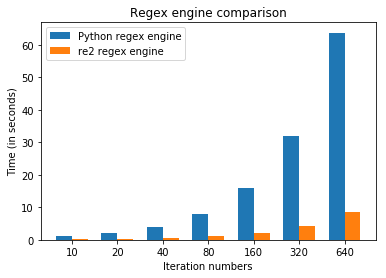

In [15]:
# code to generate figure 5.2 (not shown in text)

import matplotlib.pyplot as plt
N = 7
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, df["python_engine_time"], width, label='Python regex engine')
plt.bar(ind + width, df["re2_engine_time"], width,
    label='re2 regex engine')

plt.ylabel('Time (in seconds)')
plt.xlabel('Iteration numbers')
plt.title('Regex engine comparison')

plt.xticks(ind + width / 2, df["iteration_no"])
plt.legend(loc='best')
plt.show()

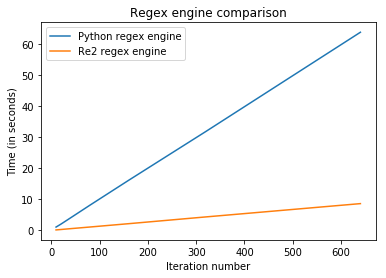

In [16]:
#Alternate image, use it if you want (shows the same thing as above)
# Not shown in text
import matplotlib.pyplot as plt
# line 1 points
df = pd.read_csv("profile.csv")
x1 = df["iteration_no"]
y1 = df["python_engine_time"]
markers_on = df["python_engine_time"].tolist()
# plotting the line 1 points
plt.plot(x1, y1, label = "Python regex engine", markevery=markers_on)
# line 2 points
x2 = df["iteration_no"]
y2 = df["re2_engine_time"]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Re2 regex engine")
plt.xlabel('Iteration number')
# Set the y axis label of the current axis.
plt.ylabel('Time (in seconds)')
# Set a title of the current axes.
plt.title('Regex engine comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [1]:
# Listing 4-8
import pandas as pd
import numpy as np
import spacy
import json
import time
from bs4 import BeautifulSoup

def get_full_text(doc):
    soup = BeautifulSoup(doc, 'html.parser')
    for s in soup(['script', 'style']):
        s.extract()
    return (soup.text.strip()).encode('ascii', 'ignore').decode("utf-8") # more info here # https://stackoverflow.com/questions/46154561/remove-zero-width-space-unicode-character-from-python-string

df = pd.read_csv("us_fda_raw_html.csv")
df["full_text"] = df["html"].apply(get_full_text)

nlp = spacy.load('en_core_web_sm')
ner_list = []
for i,document in enumerate(df["full_text"]):
    start_time = time.time()
    doc = nlp(document)
    
    person_list = []
    org_list = []
    for ent in doc.ents:
        
        if ent.label_ == 'PERSON':
            person_list.append(str(ent).lower())
        if ent.label_ == 'ORG':
            org_list.append(str(ent).lower())
    end_time = time.time()
    temp_dict = {}
    temp_dict["url"] = df["url"].iloc[i]
    temp_dict["persons"] = json.dumps(person_list)
    temp_dict["orgs"] = json.dumps(org_list)
    ner_list.append(temp_dict)
    print("Total time (in sec) for iteration number "+ str(i)+ " was " + str(end_time-start_time))

Total time (in sec) for iteration number 0 was 0.6266412734985352
Total time (in sec) for iteration number 1 was 0.2737276554107666
Total time (in sec) for iteration number 2 was 0.31283044815063477
Total time (in sec) for iteration number 3 was 0.6645603179931641
Total time (in sec) for iteration number 4 was 0.35593223571777344
Total time (in sec) for iteration number 5 was 0.23640847206115723
Total time (in sec) for iteration number 6 was 0.4902832508087158
Total time (in sec) for iteration number 7 was 0.3756136894226074
Total time (in sec) for iteration number 8 was 0.44013261795043945
Total time (in sec) for iteration number 9 was 0.401059627532959
Total time (in sec) for iteration number 10 was 0.5384316444396973
Total time (in sec) for iteration number 11 was 0.3679802417755127
Total time (in sec) for iteration number 12 was 0.5183789730072021
Total time (in sec) for iteration number 13 was 0.7830824851989746
Total time (in sec) for iteration number 14 was 0.48428773880004883
T

In [3]:
#Listing 4-9
df_ner = pd.DataFrame(ner_list)
df_ner.persons.iloc[0]

'["skip", " \\n\\n\\n\\n\\n\\n", "\\n\\n\\nsubmit", "tobacco retailer", "\\n\\n\\n\\n\\nshare", "jason s. christoffersen", "christoffersen", "lacf", "lacf", "gourmet gravy", "lot", "cook", "catch 5.5", "retort", "giblets", "giblets", "giblets", "atids", "b)(4", "lot", "lot", "lot", "lot", "lot", "dog lamb", "rice", "lot", "lot", "rice entre", "lot", "lot", "lot", "lot", "lot", "giblets", "lot", "lynn s. bonner", "compliance officer", "compliance officer bonner", "anne e. johnson", "district\\n\\n\\n", "w. patrick mcginnis", "john bear", "lydia johnson", "\\n\\n\\n\\n\\n\\nfda"]'

In [9]:
#Listing 4-10

import spacy
import re
import json
import numpy as np
import pandas as pd

df_emails = pd.read_csv("emails_re2_duplicates_removed.csv")

def ner(entities_df, email_df):
    email_person_list = []
    for i,url in enumerate(email_df["url"]):
        
        email = df_emails.email.iloc[i]

        local_email_name = email.split('@')[0]
        #print(local_email_name)
        email_name_list = re.split('[.,_,-]',local_email_name)
        
        for name in email_name_list:
            person_list = json.loads(entities_df[entities_df["url"] == url].persons.iloc[0])
            for person in person_list:
                
                if name in person:
                    temp_dict = {}
                    temp_dict["email"] = email
                    temp_dict["person"] = person
                    temp_dict['url'] = url
                    email_person_list.append(temp_dict)
                    break
        
    return email_person_list
email_person_list = ner(df_ner, df_emails)
#print(email_person_list)
pd.DataFrame(email_person_list).drop_duplicates().reset_index(drop=True)

,email,person,url
0,lynn.bonner@fda.hhs.gov,lynn s. bonner,https://www.fda.gov/inspections-compliance-enf...
1,alan@thepipeshop.co.uk,alan myerthall:,https://www.fda.gov/inspections-compliance-enf...
2,lillian.aveta@fda.hhs.gov,lillian c. aveta,https://www.fda.gov/inspections-compliance-enf...
3,matthew.dionne@fda.hhs.gov,matthew r. dionne,https://www.fda.gov/inspections-compliance-enf...
4,yvette.johnson@fda.hhs.gov,yvette johnson,https://www.fda.gov/inspections-compliance-enf...
5,robin.rivers@fda.hhs.gov,robin m. rivers,https://www.fda.gov/inspections-compliance-enf...
6,araceli.rey@fda.hhs.gov,araceli rey,https://www.fda.gov/inspections-compliance-enf...
7,robin.rivers@fda.hhs.gov,robin m. rivers,https://www.fda.gov/inspections-compliance-enf...


In [ ]:
#Listing 4-11


training_data = [
    (
        'Uber was forced to pay $20m to settle allegations that the company duped people into driving with false promises about earnings.',
        {'entities': [(0, 4, 'COM')]}
    )
]

In [5]:
#Listing 4-12

from docx import Document

from docx.shared import Inches
from docx.enum.text import WD_COLOR_INDEX

entities_yellow_set = set()

document = Document('training_sample.docx')
for paragraph in document.paragraphs:
    for run in paragraph.runs:

        if run.font.highlight_color is not None:
            
            #print(run.text, run.font.highlight_color)
            pass
        if run.font.highlight_color == WD_COLOR_INDEX.YELLOW:
            entities_yellow_set.add(run.text)

entities_list = list(entities_yellow_set)
print(entities_list)

['Waymo', 'Uber’s', 'Uber', 'Alphabet', 'Berkshire Hathaway', 'Google’s', 'General Electric']


In [8]:
#Listing 4-13

def get_start_stop_index(string_long, substring):
    len2 = len(substring)
    start_index = string_long.find(substring)
    end_index = start_index+len2
    return start_index, end_index

return_list = []
#for k in range(len(country_yellow_set)):
for paragraph in document.paragraphs:
    individual_return_tuple = []
    #print(paragraph.text)
    individual_return_tuple.append(paragraph.text.strip())
    entity_return_list = []
    return_entity_dict = {}
    for entity in entities_list:
        
        
        #entity_return_list = []
        
        if entity in paragraph.text:
            #print(entity)
            #return_tuple = []
            #print(paragraph.text)
            #return_tuple.append(paragraph.text)
            start_in, stop_in = get_start_stop_index(paragraph.text, entity)
            
            entity_return = [start_in, stop_in, "COM"]
            entity_return = tuple(entity_return)
            entity_return_list.append(entity_return)
            #print(entity_return_list)
    if len(entity_return_list) != 0:
        return_entity_dict["entities"] = entity_return_list
        #print(return_entity_dict)
        individual_return_tuple.append(return_entity_dict)
        individual_return_tuple = tuple(individual_return_tuple)
        return_list.append(individual_return_tuple)
        #print(get_start_stop_index(paragraph.text, country))
    #print("*"*20)
return_list

[('Uber was forced to pay $20m to settle allegations that the company duped people into driving with false promises about earnings.',
  {'entities': [(0, 4, 'COM')]}),
 ('The Federal Trade Commission claimed that most Uber drivers earned far less than the rates Uber published online in 18 major cities in the US.',
  {'entities': [(47, 51, 'COM')]}),
 ('Former Uber engineer Susan Fowler went public with allegations of sexual harassment and discrimination, prompting the company to hire former US attorney general Eric Holder to investigate her claims.',
  {'entities': [(7, 11, 'COM')]}),
 ('Waymo, the self-driving car company owned by Google’s parent corporation Alphabet, filed a lawsuit against Uber, accusing the startup of “calculated theft” of its technology.',
  {'entities': [(0, 5, 'COM'),
    (107, 111, 'COM'),
    (73, 81, 'COM'),
    (45, 53, 'COM')]}),
 ('The suit, which could be a fatal setback for Uber’s autonomous vehicle ambitions, alleged that a former Waymo employee, Anthon

In [18]:
# Listing 4-14
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding

# new entity label
label_list = ["COM"]

def train_ner(TRAIN_DATA,label_list,output_model_name, model=None,n_iter=30):
    random.seed(0)
    if model is not None:
        nlp = spacy.load(model)
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")
        print("Created blank 'en' model")

    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner)
    else:
        ner = nlp.get_pipe("ner")
    for LABEL in label_list:
        ner.add_label(LABEL)  
    nlp.vocab.vectors.name = 'spacy_pretrained_vectors'
    if model is None:
        
        optimizer = nlp.begin_training()
    else:
        
        optimizer = nlp.resume_training()
    move_names = list(ner.move_names)
   
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        sizes = compounding(1.0, 4.0, 1.001)
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            batches = minibatch(TRAIN_DATA, size=sizes)
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.35, losses=losses)
            print("Losses", losses)
    nlp.to_disk(output_model_name)
train_ner(TRAIN_DATA = return_list, label_list = label_list, output_model_name = 'ner_company', model = None,n_iter=30)

Created blank 'en' model
Losses {'ner': 73.29305328331125}
Losses {'ner': 28.609920230269758}
Losses {'ner': 22.84507976165346}
Losses {'ner': 17.49904894383679}
Losses {'ner': 11.414351243276446}
Losses {'ner': 9.101663951377668}
Losses {'ner': 5.267494453267735}
Losses {'ner': 0.5274157429486094}
Losses {'ner': 5.515589335372427}
Losses {'ner': 1.2058509063100247}
Losses {'ner': 0.034352628598915316}
Losses {'ner': 3.998464111365581}
Losses {'ner': 2.045643676879328}
Losses {'ner': 0.2544095753072009}
Losses {'ner': 3.1612663279231046}
Losses {'ner': 2.0002408098323947}
Losses {'ner': 2.3651013551862197}
Losses {'ner': 3.9945953801627176}
Losses {'ner': 5.444443987547984}
Losses {'ner': 3.9993801117102756}
Losses {'ner': 1.999933719635059}
Losses {'ner': 0.00016759568611773816}
Losses {'ner': 7.737405588428668e-05}
Losses {'ner': 1.999963760379788}
Losses {'ner': 7.545372597637903e-15}
Losses {'ner': 4.697406133102387e-09}
Losses {'ner': 0.0011829053454656055}
Losses {'ner': 0.014950

In [19]:
# Listing 4-15

test_text = "SoftBank is often described as the Berkshire Hathaway of tech. That was once a flattering comparison. But the investing track records for the Japanese firm run by Masayoshi Son and Berkshire's Warren Buffett have soured lately."
nlp2 = spacy.load("ner_company")
doc2 = nlp2(test_text)
for ent in doc2.ents:
    if ent.label_ == 'COM':
        print(ent.label_, ent.text)

COM Berkshire Hathaway
COM Masayoshi Son


In [2]:
# Listing 4-16

import numpy as np
import pandas as pd
import os

directory = []
file = []
title = []
text = []
label = []
#datapath = r'C:\Users\Jay M. Patel\Documents\jupyter_notebook_workspace\getting_structured_data_book\chapter_5_intro_nlp\bbc-fulltext\bbc' 
datapath = r'yourfilepath\bbc-fulltext\bbc' 
for dirname, dir2 , filenames in os.walk(datapath):

    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('\\')[-1])
        #print(filename)
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)


In [ ]:
# EDA

In [4]:
df = pd.DataFrame({'title':title, 'text': text, 'label':label})
df.to_csv("bbc_news_data.csv")
df.head()

,title,text,label
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarn...,business
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against...,business
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yu...,business
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices ...,business
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dom...,business


In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("bbc_news_data.csv")

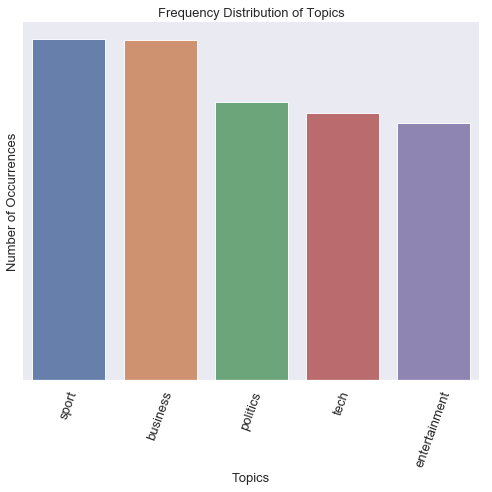

In [3]:
# Listing 4-17
import matplotlib.pyplot as plt
import seaborn as sns
    
sns.set(style="darkgrid")
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# this creates bar graph for one column called "topic"
col_count_2 = df['label'].value_counts()
sns.set(style="darkgrid")
sns.barplot(col_count_2.index, col_count_2.values, alpha=0.9)
plt.title('Frequency Distribution of Topics', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('Topics', fontsize=13)

plt.xticks(rotation=70, fontsize=13)

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [4]:
# Listing 4-18

# top words in text

from collections import Counter
termfrequency_text = Counter()
texts = df["text"]
for text in texts:
    text_list = text.split(' ')
    for token in text_list:
        termfrequency_text[token] +=1
print(termfrequency_text.most_common(10))
print(len(termfrequency_text.keys()))

[('the', 44432), ('to', 24460), ('of', 19756), ('and', 17867), ('a', 17115), ('in', 16316), ('', 13187), ('is', 8427), ('for', 8424), ('that', 7528)]
64779


In [ ]:
# Listing 4-19

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color="white").generate_from_frequencies(frequencies=termfrequency_text)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
# Listing 4-20

from nltk.tokenize import TreebankWordTokenizer
sample_text = "can't don't won't I've running run ran double"
def tokenizer_tree(sample_text):
    tokenizer = TreebankWordTokenizer()
    tokenized_list= tokenizer.tokenize(sample_text)
    return tokenized_list
tokenizer_tree(sample_text)

['ca',
 "n't",
 'do',
 "n't",
 'wo',
 "n't",
 'I',
 "'ve",
 'running',
 'run',
 'ran',
 'double']

In [7]:
#Listing 4-21
# Spacy Tokenization example
sample_text =  "can't don't won't I've running run ran double"
from spacy.lang.en import English
nlp = English()
tokenizer = nlp.Defaults.create_tokenizer(nlp)
tokens = tokenizer(sample_text)
token_list = []
for token in tokens:
    token_list.append(token.text)
print(token_list)

['ca', "n't", 'do', "n't", 'wo', "n't", 'I', "'ve", 'running', 'run', 'ran', 'double']


In [8]:
#Listing 4-22
from nltk.stem.porter import PorterStemmer
def stemmer_porter(text_list):
    porter = PorterStemmer()
    return_list = []
    for i in range(len(text_list)):
        return_list.append(porter.stem(text_list[i]))
    return(return_list)

# Another popular stemmer

from nltk.stem.snowball import SnowballStemmer

def stemmer_snowball(text_list):
    snowball = SnowballStemmer(language='english')
    return_list = []
    for i in range(len(text_list)):
        return_list.append(snowball.stem(text_list[i]))
    return(return_list)

print(stemmer_porter(tokenizer_tree(sample_text)))
print(stemmer_snowball(tokenizer_tree(sample_text)))


['ca', "n't", 'do', "n't", 'wo', "n't", 'I', "'ve", 'run', 'run', 'ran', 'doubl']
['ca', "n't", 'do', "n't", 'wo', "n't", 'i', 've', 'run', 'run', 'ran', 'doubl']


In [9]:
#Listing 4-23
sample_text =  "can't don't won't running run ran double"
from spacy.lang.en import English
def tokenizer_lemma(corpus_text):
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(corpus_text)

    lemma_list = []
    for token in tokens:


        lemma_list.append(str(token.lemma_).lower())
    return lemma_list
print(tokenizer_lemma(sample_text))

['can', 'not', 'do', 'not', 'will', 'not', 'run', 'run', 'run', 'double']


In [10]:
#Listing 4-24

def snowball_treebank(sample_string):
    return stemmer_snowball(tokenizer_tree(sample_string))

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=snowball_treebank)
cv_train = cv.fit_transform(df["text"])
df_dtm = pd.DataFrame(cv_train.toarray(), columns=cv.get_feature_names())
df_dtm.head()

,!,#,$,%,&,','','.,'d,'m,...,"£950,000",£952m,£960m,£96bn,£97m,£98,£980m,£98m,£99,£9m
0,0,0,9,8,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Listing 4-24 (cont.)
top_10_count = pd.DataFrame(np.asarray(cv_train.sum(axis=0)),columns=cv.get_feature_names()).transpose().rename(columns = str).sort_values(by = '0',axis = 0, ascending = False).head(10)
top_10_count

,0
the,52542
",",35436
to,24632
of,19886
and,18535
a,18255
in,17409
``,11160
it,9890
'',9282


In [11]:
#Listing 4-25
import re

def preprocessor_final(text):
    if isinstance((text), (str)):
        text = re.sub('<[^>]*>', ' ', text)
        text = re.sub('[\W]+', ' ', text.lower())
        return text
    if isinstance((text), (list)):
        return_list = []
        for i in range(len(text)):
            temp_text = re.sub('<[^>]*>', '', text[i])
            temp_text = re.sub('[\W]+', '', temp_text.lower())
            return_list.append(temp_text)
        return(return_list)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, preprocessor=preprocessor_final, tokenizer=snowball_treebank)
cv_train = cv.fit_transform(df["text"])
df_dtm = pd.DataFrame(cv_train.toarray(), columns=cv.get_feature_names())
df_dtm.head()

,0,00,000,0001,000bn,000m,000s,000th,001,001and,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Listing 4-25 (Cont.)
top_10_count = pd.DataFrame(np.asarray(cv_train.sum(axis=0)),columns=cv.get_feature_names()).transpose().rename(columns = str).sort_values(by = '0',axis = 0, ascending = False).head(10)
top_10_count

,0
the,52574
to,24767
of,19930
and,18574
a,18297
in,17558
it,10171
s,8954
for,8732
is,8534


In [ ]:
# Listing 4-26

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, preprocessor=preprocessor_final, tokenizer=snowball_treebank, ngram_range=(1, 2))
cv_train = cv.fit_transform(df["text"])
df_dtm = pd.DataFrame(cv_train.toarray(), columns=cv.get_feature_names())
df_dtm.head()

In [12]:
# Listing 4-27

stop_words_string = '''less,hers,meanwhile,then,fire,been,couldnt,hundred,forty,nine,every,over,these,where,all,cannot,due,interest,this,by,yet,formerly,or,will,fifty,hereupon,again,behind,nor,sincere,thereafter,front,and,to,whereupon,eight,into,me,somehow,which,must,thick,with,anywhere,co,mill,once,almost,how,should,first,off,un,since,i,same,an,throughout,however,one,between,someone,whereafter,during,became,six,ltd,something,often,latter,find,their,her,whereas,thereby,full,has,still,done,former,our,up,ever,my,detail,see,third,herself,us,very,myself,describe,there,ourselves,thru,thence,much,somewhere,moreover,your,perhaps,back,ten,whereby,twelve,have,via,before,as,mostly,yourselves,name,toward,would,nowhere,enough,sixty,them,put,yours,therein,if,be,alone,along,anything,do,fill,now,re,made,few,whose,it,his,seems,is,more,upon,any,amoungst,last,give,otherwise,are,being,herein,yourself,others,through,namely,becoming,several,also,cry,everything,of,together,towards,five,no,because,con,show,anyway,ie,can,therefore,three,a,indeed,afterwards,found,hereby,move,itself,amount,please,seemed,out,she,than,such,amongst,beyond,but,hence,become,ours,so,least,thus,while,everywhere,here,bill,anyhow,whether,had,in,eleven,fifteen,on,whom,you,other,already,neither,above,part,per,else,another,below,get,elsewhere,he,whatever,who,even,himself,latterly,hereafter,against,many,always,empty,among,whence,until,beside,twenty,besides,hasnt,side,some,for,never,system,wherever,might,not,inc,eg,etc,none,whither,him,its,nevertheless,themselves,two,around,rather,after,they,de,am,further,whole,everyone,thin,within,go,noone,nothing,sometimes,that,whoever,whenever,seeming,beforehand,across,may,thereupon,nobody,from,only,we,why,about,either,wherein,call,the,own,those,under,what,well,top,were,onto,next,becomes,could,each,serious,take,four,both,seem,when,without,cant,although,mine,sometime,keep,at,down,though,was,too,except,anyone,bottom,most'''

In [13]:
# Listing 4-28
from sklearn.feature_extraction.text import CountVectorizer

stop_words_list = stop_words_string.split(',')
stemmed_stop_words_list = stemmer_snowball(stop_words_list)
cv = CountVectorizer(stop_words = stemmed_stop_words_list,lowercase=True, preprocessor=preprocessor_final, tokenizer=snowball_treebank)
cv_train = cv.fit_transform(df["text"])
df_dtm = pd.DataFrame(cv_train.toarray(), columns=cv.get_feature_names())
df_dtm.head()

C:\ProgramData\Anaconda3\envs\spacy-env\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,0,00,000,0001,000bn,000m,000s,000th,001,001and,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
top_10_count = pd.DataFrame(np.asarray(cv_train.sum(axis=0)),columns=cv.get_feature_names()).transpose().rename(columns = str).sort_values(by = '0',axis = 0, ascending = False).head(10)
top_10_count

,0
s,8954
said,7254
year,3296
mr,3005
peopl,2043
new,1909
time,1656
game,1634
say,1569
use,1568


In [ ]:
# Listing 4-29
from spacy.lang.en import English
start_time = time.time()

def tokenizer_lemma_stop_words(corpus_text):
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(corpus_text)

    lemma_list = []
    for token in tokens:

        if token.is_stop is False:

            lemma_list.append(str(token.lemma_).lower())
    return lemma_list


In [2]:
# just fetching the df again in case you directly want to create tf-idf vectors for using it in topic modeling.
import numpy as np
import pandas as pd
df = pd.read_csv("bbc_news_data.csv")

In [3]:
# Listing 4-30
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print("Train df shape is: ",train.shape)
print("Test df shape is: ",test.shape)

Train df shape is:  (1780, 4)
Test df shape is:  (445, 4)


In [4]:
# Listing 4-30 (cont.)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer(stop_words='english', 
                                   ngram_range=(1, 2),max_df=0.97, min_df = 0.03, lowercase=True, max_features=2500)



In [5]:
# Listing 4-30 (cont.)
X_train_text = tfidf_transformer.fit_transform(train['text'])
df_dtm = pd.DataFrame(X_train_text.toarray(), columns=tfidf_transformer.get_feature_names())
df_dtm.head()

,000,10,100,11,12,13,14,15,16,17,...,worldwide,worth,written,wrong,year,year old,years,years ago,york,young
0,0.187213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.064787,0.059774,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.088653,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.205088,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.046516,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.076281,0.000000,0.0,0.000000,0.140198,0.0,0.000000,0.000000,0.0,0.0
3,0.122212,0.000000,0.0,0.246591,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.096160,0.039134,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.069083,0.0,0.133335,0.000000,0.0,0.000000,0.000000,0.0,0.0


# Topic modeling

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [74]:
# Listing 4-31
from sklearn.decomposition import LatentDirichletAllocation
num_topics = 4

lda_tfidf = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_tfidf.fit(X_train_text)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [6]:
#Listing 4-32
def print_top_words(model, feature_names, n_top_words):
    df_transpose = pd.DataFrame(model.components_, columns = feature_names).transpose()
    topic_names = [col for col in df_transpose.columns]
    for i, topic in enumerate(topic_names):
        message = "Topic #%d: " % topic
        message += " ".join(word for word in list(df_transpose[topic].sort_values(axis = 0, ascending = False).head(n_top_words).index))
        print(message)
    print()
tf_feature_names = np.array(tfidf_transformer.get_feature_names())

In [75]:
print_top_words(lda_tfidf, tf_feature_names, n_top_words = 20)

Topic #0: said mr people year new company government firm market uk 000 sales growth technology mobile 2004 use bank companies world
Topic #1: film mr said labour best blair party election brown awards howard award mr blair star band actor year minister album prime
Topic #2: game england club win said match players team season play cup injury time chelsea final ireland year wales world games
Topic #3: chart proposed groups season department prize officials beat charges poll send increased protect growing create giant japan loss generation 500



In [76]:
#Listing 4-33
df_transpose = pd.DataFrame(lda_tfidf.components_, columns = tf_feature_names).transpose()
pd.DataFrame(lda_tfidf.transform(df_dtm.iloc[:1]), columns = ["Topic"+str(col) for col in df_transpose.columns])

,Topic0,Topic1,Topic2,Topic3
0,0.876727,0.041352,0.042201,0.03972


In [77]:
# not shown in text but you can manually inspect full text to make sure topics identified makes sense
train['text'].iloc[0]

'  An executive who froze his broken hard disk thinking it would be fixed has topped a list of the weirdest computer mishaps.  Although computer malfunctions remain the most common cause of file loss, data recovery experts say human behaviour still is to blame in many cases. They say that no matter how effective technology is at rescuing files, users should take more time to back-up and protect important files. The list of the top 10 global data disasters was compiled by recovery company Ontrack.  Careless - and preventable - mistakes that result in data loss range from reckless file maintenance practices to episodes of pure rage towards a computer. This last category includes the case of a man who became so mad with his malfunctioning laptop that he threw it in the lavatory and flushed a couple of times. "Data can disappear as a result of natural disaster, system fault or computer virus, but human error, including \'computer rage\', seems to be a growing problem," said Adrian Palmer, 

In [78]:
# not shown in text but you can manually inspect category label to make sure topics identified makes sense

train["label"].iloc[0]

'tech'

In [79]:
#Listing 4-34
from sklearn.decomposition import LatentDirichletAllocation
num_topics = [5,6,7,8]
def print_lda_terms(num_topics):
    for num_topic in num_topics:
        print("*"*20)
        print("Number of Topics %d: " % num_topic)
        lda_tfidf = LatentDirichletAllocation(n_components=num_topic, random_state=0)
        lda_tfidf.fit(X_train_text)
        print_top_words(lda_tfidf, tf_feature_names, n_top_words = 20)
print_lda_terms(num_topics)

********************
Number of Topics 5: 
Topic #0: said people mr year new company 000 firm market uk music sales growth technology mobile 2004 bank world companies economy
Topic #1: film best awards award actor star films actress oscar comedy singer director stars won tv movie hollywood year series number
Topic #2: game said england club win match play players team time year season cup injury final world chelsea ireland wales old
Topic #3: sign value account growing capital giant non tour limited generation title signed business living finding jobs leader 500 thousands cash
Topic #4: mr said labour blair party election government brown minister mr blair howard prime prime minister mr brown secretary lord tory chancellor leader police

********************
Number of Topics 6: 
Topic #0: said mr people new government labour uk party music election blair told 000 says use make year mobile like technology
Topic #1: film best awards award actor star band album actress singer oscar films c

In [81]:
#Listing 4-35

import pyLDAvis
import pyLDAvis.sklearn
# https://github.com/bmabey/pyLDAvis/issues/127
# without sort_topics we will get different topic_ids than what we get above
# sklearn offsets start with 0 whereas this starts with 1
num_topics = 5
lda_tfidf = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_tfidf.fit(X_train_text)
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tfidf, X_train_text, tfidf_transformer, mds='mmds', sort_topics=False)

C:\ProgramData\Anaconda3\envs\spacy-env\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.091333 -0.000874       1        1  46.820357
1      0.000940  0.174937       2        1   9.708598
2     -0.140641 -0.007937       3        1  23.906176
3      0.004554 -0.007843       4        1   2.561201
4      0.043815 -0.158283       5        1  17.003668, topic_info=     Category       Freq               Term       Total  loglift  logprob
term                                                                     
380   Default  47.000000               film   47.000000  30.0000  30.0000
636   Default  78.000000                 mr   78.000000  29.0000  29.0000
128   Default  37.000000               best   37.000000  28.0000  28.0000
521   Default  29.000000             labour   29.000000  27.0000  27.0000
108   Default  18.000000             awards   18.000000  26.0000  26.0000
135   Default  24.000000              blair   24.000000  25.0000  25.0000
331   Default  26.000000           election   26.000000  24.0000  24.0000
692   Default  26.000000              party   26.000000  23.0000  23.0000
107   Default  17.000000              award   17.000000  22.0000  22.0000
406   Default  35.000000               game   35.000000  21.0000  21.0000
913   Default  19.000000               star   19.000000  20.0000  20.0000
49    Default  15.000000              actor   15.000000  19.0000  19.0000
429   Default  37.000000         government   37.000000  18.0000  18.0000
381   Default  15.000000              films   15.000000  17.0000  17.0000
992   Default  22.000000                 tv   22.000000  16.0000  16.0000
1042  Default  26.000000                won   26.000000  15.0000  15.0000
620   Default  22.000000           minister   22.000000  14.0000  14.0000
306   Default  20.000000           director   20.000000  13.0000  13.0000
637   Default  16.000000           mr blair   16.000000  12.0000  12.0000
50    Default  11.000000            actress   11.000000  11.0000  11.0000
149   Default  20.000000              brown   20.000000  10.0000  10.0000
683   Default  11.000000              oscar   11.000000   9.0000   9.0000
206   Default  22.000000               club   22.000000   8.0000   8.0000
209   Default  11.000000             comedy   11.000000   7.0000   7.0000
617   Default  24.000000            million   24.000000   6.0000   6.0000
881   Default  12.000000             singer   12.000000   5.0000   5.0000
914   Default  11.000000              stars   11.000000   4.0000   4.0000
632   Default  11.000000              movie   11.000000   3.0000   3.0000
335   Default  27.000000            england   27.000000   2.0000   2.0000
468   Default  17.000000             howard   17.000000   1.0000   1.0000
...       ...        ...                ...         ...      ...      ...
613    Topic5   6.863205     michael howard    7.710486   1.6553  -5.7014
635    Topic5   9.312019                mps   10.585941   1.6435  -5.3962
746    Topic5  12.844995     prime minister   14.689748   1.6375  -5.0746
233    Topic5   6.722453       conservative    7.798585   1.6233  -5.7221
866    Topic5   5.553742             shadow    6.481235   1.6173  -5.9131
548    Topic5   5.008584  liberal democrats    5.856372   1.6154  -6.0164
218    Topic5   7.556245            commons    8.882894   1.6100  -5.6052
533    Topic5  11.638200             leader   13.725181   1.6068  -5.1733
745    Topic5  12.957395              prime   15.283320   1.6066  -5.0659
157    Topic5   6.019344            cabinet    7.123302   1.6033  -5.8326
427    Topic5   5.400955       gordon brown    6.443811   1.5952  -5.9410
290    Topic5   5.045945          democrats    6.034149   1.5929  -6.0090
468    Topic5  14.267932             howard   17.071567   1.5923  -4.9695
723    Topic5   6.008626           politics    7.196589   1.5913  -5.8344
234    Topic5   5.815069      conservatives    7.007698   1.5852  -5.8671
149    Topic5  17.054082   

In [61]:
#Listing 4-36

# convert these to use for gensim
# https://stackoverflow.com/questions/21552518/using-scikit-learn-vectorizers-and-vocabularies-with-gensim
import gensim
from gensim.corpora.dictionary import Dictionary

def sklearnvect2gensim(vectorizer, dtmatrix):
    corpus_vect_gensim = gensim.matutils.Sparse2Corpus(dtmatrix, documents_columns=False)
    dictionary = Dictionary.from_corpus(corpus_vect_gensim, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

    return (corpus_vect_gensim, dictionary)

(gensim_corpus, gensim_dict) = sklearnvect2gensim(tfidf_transformer, X_train_text)

In [62]:
#Listing 4-36 (cont.)
print(type(gensim_corpus))
print(gensim_corpus[0][:10])
print(gensim_dict[gensim_corpus[0][0][0]])
if df_dtm[gensim_dict[gensim_corpus[0][0][0]]].iloc[0] == gensim_corpus[0][0][1]:
    print("True")


<class 'gensim.matutils.Sparse2Corpus'>
[(421, 0.0570566345143319), (145, 0.16739425616154216), (314, 0.2551493009343519), (167, 0.05427147735416746), (516, 0.23678419419339075), (125, 0.05827332788493036), (943, 0.052998652537136086), (721, 0.10577641952954958), (146, 0.11470305033534169), (341, 0.0821091733728967)]
gordon
True


In [63]:
#Listing 4-37

# You might need to silence deprecation warnings if you are using older gensim versions. 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

lda_model = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [64]:
# Listing 4-37 (cont.)
def print_gensim_topics(model):
    topics_list = model.print_topics(num_words=20)
    num_topics = len(model.print_topics())
    for i in range(len(topics_list)):
        print("*"*20)
        print("Topics #%d: " % topics_list[i][0])
        print(topics_list[i][1])
print_gensim_topics(lda_model)

********************
Topics #0: 
0.056*"film" + 0.052*"music" + 0.027*"best" + 0.024*"stars" + 0.022*"films" + 0.020*"singer" + 0.020*"band" + 0.019*"awards" + 0.018*"award" + 0.017*"rock" + 0.017*"star" + 0.015*"comedy" + 0.015*"olympic" + 0.015*"release" + 0.014*"album" + 0.014*"audience" + 0.013*"prize" + 0.013*"director" + 0.012*"actor" + 0.012*"british"
********************
Topics #1: 
0.015*"year" + 0.012*"said" + 0.010*"new" + 0.008*"company" + 0.008*"world" + 0.008*"firm" + 0.008*"sales" + 0.007*"game" + 0.007*"years" + 0.007*"time" + 0.007*"bank" + 0.007*"2004" + 0.006*"told" + 0.006*"control" + 0.006*"end" + 0.006*"won" + 0.006*"just" + 0.006*"market" + 0.006*"000" + 0.006*"group"
********************
Topics #2: 
0.019*"mr" + 0.019*"said" + 0.012*"people" + 0.009*"party" + 0.008*"election" + 0.007*"government" + 0.007*"labour" + 0.007*"england" + 0.007*"wales" + 0.007*"brown" + 0.007*"like" + 0.007*"public" + 0.006*"uk" + 0.006*"number" + 0.006*"work" + 0.005*"plans" + 0.005*

In [58]:
# Listing 4-37 (cont.)
from gensim.models import CoherenceModel
print('Perplexity: ', lda_model.log_perplexity(gensim_corpus))

coherence_model_lda = CoherenceModel(model=lda_model,corpus=gensim_corpus, dictionary=gensim_dict,coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.69910594677255
Coherence Score:  -2.3484461739271296


In [66]:
# Listing 4-37 (cont.)
vector = lda_model[gensim_corpus[0]]
vector[0]

[(0, 0.019926809),
 (1, 0.08428456),
 (2, 0.7394348),
 (3, 0.12830141),
 (4, 0.0280524)]

In [98]:
# Listing 4-38
def calculate_coherence_values(gensim_dict, gensim_corpus, limit, start=2, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherence_model_lda = CoherenceModel(model=lda_model,corpus=gensim_corpus, dictionary=gensim_dict,coherence='u_mass')
        
        coherence_values.append(coherence_model_lda.get_coherence()*-1)

    return model_list, coherence_values

In [99]:
# Listing 4-38 (Cont.)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
model_list, coherence_values = calculate_coherence_values(gensim_dict=gensim_dict, gensim_corpus=gensim_corpus, start=2, limit=10, step=1)

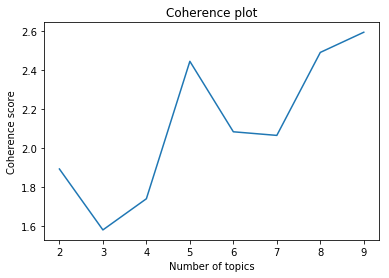

In [100]:
# Listing 4-38 (cont.)
import matplotlib.pyplot as plt
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title("Coherence plot")
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.show()

In [15]:
# Listing 4-39
from sklearn.decomposition import NMF
n_components = 6
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5)
nmf_tfidf = nmf.fit(X_train_text)
print_top_words(nmf_tfidf, tf_feature_names, n_top_words = 20)

Topic #0: game win england said match play players cup club team time final season wales year world injury good chelsea games
Topic #1: mr labour blair election party said brown mr blair government minister howard mr brown prime prime minister chancellor tory tax leader tories plans
Topic #2: people music said software users technology microsoft computer digital net internet online new broadband security tv information use web service
Topic #3: film best award awards actor actress director oscar films won star movie comedy prize ceremony british year hollywood stars role
Topic #4: said year growth market economy company sales oil bank 2004 firm economic shares prices china dollar government new deal rise
Topic #5: mobile phone phones technology services use people customers service data networks using video network uk access calls digital devices million



In [20]:
# Listing 4-40
tf_feature_names = np.array(tfidf_transformer.get_feature_names())
df_transpose = pd.DataFrame(nmf_tfidf.components_, columns = tf_feature_names).transpose()
pd.DataFrame(nmf_tfidf.transform(df_dtm.iloc[:1]), columns = ["Topic"+str(col) for col in df_transpose.columns])

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5
0,0.0,0.126342,0.0,0.0,0.061525,0.0


In [11]:
# not shown in text, just a sanity check to make sure topics make sense
train["text"].iloc[0]

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [17]:
# only figure screenshot shown in text, this is essentially the same code as listing 4-35
import pyLDAvis
import pyLDAvis.sklearn
# https://github.com/bmabey/pyLDAvis/issues/127
# without sort_topics we will get different topic_ids than what we get above
# sklearn offsets start with 0 whereas this starts with 1
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(nmf_tfidf, X_train_text, tfidf_transformer, mds='mmds', sort_topics=False)


C:\ProgramData\Anaconda3\envs\spacy-env\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\ProgramData\Anaconda3\envs\spacy-env\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\ProgramData\Anaconda3\envs\spacy-env\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\ProgramData\Anaconda3\envs\spacy-env\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.209222 -0.050115       1        1  25.280543
1      0.212550  0.222029       2        1  17.204326
2     -0.109829  0.027920       3        1  20.514439
3      0.139240 -0.298906       4        1   9.495224
4     -0.061357  0.246114       5        1  24.357136
5     -0.389827 -0.147041       6        1   3.148332, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
612   Default  61.000000      mobile  61.000000  30.0000  30.0000
373   Default  78.000000        film  78.000000  29.0000  29.0000
694   Default  42.000000       phone  42.000000  28.0000  28.0000
695   Default  32.000000      phones  32.000000  27.0000  27.0000
123   Default  51.000000        best  51.000000  26.0000  26.0000
624   Default  99.000000          mr  99.000000  25.0000  25.0000
941   Default  34.000000  technology  34.000000  24.0000  24.0000
516   Default  45.000000      labour  45.000000  23.0000  23.0000
688   Default  62.000000      people  62.000000  22.0000  22.0000
130   Default  38.000000       blair  38.000000  21.0000  21.0000
319   Default  37.000000    election  37.000000  20.0000  20.0000
682   Default  34.000000       party  34.000000  19.0000  19.0000
104   Default  26.000000       award  26.000000  18.0000  18.0000
987   Default  26.000000         use  26.000000  17.0000  17.0000
105   Default  25.000000      awards  25.000000  16.0000  16.0000
850   Default  25.000000    services  25.000000  15.0000  15.0000
145   Default  29.000000       brown  29.000000  14.0000  14.0000
849   Default  23.000000     service  23.000000  13.0000  13.0000
48    Default  21.000000       actor  21.000000  12.0000  12.0000
399   Default  47.000000        game  47.000000  11.0000  11.0000
293   Default  24.000000     digital  24.000000  10.0000  10.0000
260   Default  21.000000        data  21.000000   9.0000   9.0000
877   Default  29.000000    software  29.000000   8.0000   8.0000
625   Default  26.000000    mr blair  26.000000   7.0000   7.0000
49    Default  19.000000     actress  19.000000   6.0000   6.0000
1026  Default  32.000000         won  32.000000   5.0000   5.0000
995   Default  21.000000       video  21.000000   4.0000   4.0000
672   Default  18.000000       oscar  18.000000   3.0000   3.0000
989   Default  29.000000       users  29.000000   2.0000   2.0000
295   Default  26.000000    director  26.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
771    Topic6   2.979579       range   8.897095   2.3644  -4.8441
405    Topic6   2.323189  generation   7.148893   2.3343  -5.0930
941    Topic6  11.189877  technology  34.664023   2.3276  -3.5209
990    Topic6   5.626138       using  17.917406   2.2999  -4.2085
845    Topic6   3.061067        sent   9.771319   2.2976  -4.8171
850    Topic6   7.823485    services  25.185701   2.2892  -3.8788
287    Topic6   3.974015     devices  12.866884   2.2834  -4.5561
260    Topic6   6.126781        data  21.294648   2.2125  -4.1232
987    Topic6   7.622127         use  26.570541   2.2095  -3.9048
41     Topic6   4.174153      access  15.297049   2.1595  -4.5070
849    Topic6   6.367004     service  23.546905   2.1504  -4.0848
432    Topic6   2.658681     growing   9.967642   2.1368  -4.9581
697    Topic6   1.799922     picture   6.798870   2.1293  -5.3482
995    Topic6   5.227642       video  21.490530   2.0446  -4.2819
597    Topic6   1.501495     message   6.783920   1.9502  -5.5294
27     Topic6   1.276953          26   5.806366   1.9438  -5.6914
1007   Topic6   1.238287        ways   5.684992   1.9342  -5.7222
338    Topic6   0.832777    existing   4.086226   1.8677  -6.1189
233    Topic6   2.182146   consumers  11.013361   1.8395  -5.1556
357    Topic6   1.156450        fast   5.872073   1.8334  -5.7905
856    Topic6   1.942751   

In [22]:
# same as listing 4-36
# convert these to use for gensim
# https://stackoverflow.com/questions/21552518/using-scikit-learn-vectorizers-and-vocabularies-with-gensim
import gensim
from gensim.corpora.dictionary import Dictionary

def sklearnvect2gensim(vectorizer, dtmatrix):
    corpus_vect_gensim = gensim.matutils.Sparse2Corpus(dtmatrix, documents_columns=False)
    dictionary = Dictionary.from_corpus(corpus_vect_gensim, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

    return (corpus_vect_gensim, dictionary)

(gensim_corpus, gensim_dict) = sklearnvect2gensim(tfidf_transformer, X_train_text)

In [25]:
# Listing 4-41

from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel

lsi_model = LsiModel(corpus = gensim_corpus, id2word=gensim_dict,  num_topics=5)
#print(model.print_topics())

In [26]:
# Listing 4-41 (cont.)

def print_gensim_topics(model):
    topics_list = model.print_topics(num_words=20)
    num_topics = len(model.print_topics())
    for i in range(len(topics_list)):
        print("*"*20)
        print("Topics #%d: " % topics_list[i][0])
        print(topics_list[i][1])
print_gensim_topics(lsi_model)

********************
Topics #0: 
0.302*"said" + 0.217*"mr" + 0.138*"year" + 0.132*"people" + 0.121*"new" + 0.095*"film" + 0.093*"government" + 0.092*"world" + 0.089*"time" + 0.085*"uk" + 0.083*"game" + 0.082*"labour" + 0.076*"best" + 0.075*"told" + 0.075*"music" + 0.075*"years" + 0.073*"just" + 0.072*"000" + 0.071*"like" + 0.070*"party"
********************
Topics #1: 
0.358*"mr" + 0.224*"labour" + 0.188*"election" + 0.187*"blair" + -0.181*"film" + 0.164*"party" + -0.156*"game" + -0.143*"best" + 0.141*"brown" + 0.141*"government" + 0.133*"mr blair" + 0.116*"minister" + 0.115*"mr brown" + 0.106*"tax" + 0.102*"chancellor" + 0.102*"prime" + 0.101*"prime minister" + 0.100*"howard" + -0.100*"win" + -0.095*"play"
********************
Topics #2: 
-0.154*"labour" + 0.151*"mobile" + -0.140*"blair" + -0.134*"mr" + 0.126*"market" + -0.124*"election" + 0.122*"firm" + -0.120*"win" + 0.118*"technology" + 0.116*"users" + 0.114*"company" + -0.114*"brown" + -0.114*"game" + -0.113*"party" + 0.108*"sales

In [28]:
# Listing 4-41 (cont.)
vector = lsi_model[gensim_corpus[0]]
print(vector)

[(0, 0.3554863441840997),
 (1, 0.31045356819716763),
 (2, -0.0918747151790444),
 (3, 0.014948992695977962),
 (4, 0.13127935192395496)]

In [71]:
# code not shown in text
def calculate_lsi_coherence_values(gensim_dict, gensim_corpus, limit, start=2, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lsi_model = LsiModel(corpus = gensim_corpus, id2word=gensim_dict,  num_topics=num_topics)
        
        model_list.append(lsi_model)
        coherence_model_lsi = CoherenceModel(model=lsi_model,corpus=gensim_corpus, dictionary=gensim_dict,coherence='u_mass')
        
        coherence_values.append(coherence_model_lsi.get_coherence()*-1)

    return model_list, coherence_values

In [72]:
# code not shown in text
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
model_list, coherence_values = calculate_lsi_coherence_values(gensim_dict=gensim_dict, gensim_corpus=gensim_corpus, start=2, limit=10, step=1)

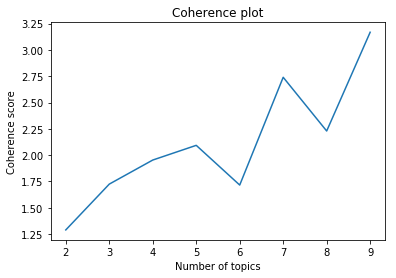

In [73]:
# code not shown in text
import matplotlib.pyplot as plt
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title("Coherence plot")
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.show()

# Text clustering

In [1]:
# This is here just in case you want to directly test text clustering section

import numpy as np
import pandas as pd
df = pd.read_csv("bbc_news_data.csv")
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print("Train df shape is: ",train.shape)
print("Test df shape is: ",test.shape)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer(stop_words='english', 
                                   ngram_range=(1, 2),max_df=0.97, min_df = 0.03, lowercase=True, max_features=2500)

X_train_text = tfidf_transformer.fit_transform(train['text'])
df_dtm = pd.DataFrame(X_train_text.toarray(), columns=tfidf_transformer.get_feature_names())
df_dtm.head()

Train df shape is:  (1780, 4)
Test df shape is:  (445, 4)


,000,10,100,11,12,13,14,15,16,17,...,worldwide,worth,written,wrong,year,year old,years,years ago,york,young
0,0.0,0.053006,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.032503,0.000000,0.000000,0.0,0.00000,0.074543
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.057609,0.112392,0.157958,0.0,0.00000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.021112,0.000000,0.028943,0.0,0.09892,0.000000
3,0.0,0.072859,0.0,0.0,0.0,0.102698,0.10706,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.134028,0.087160,0.061248,0.0,0.00000,0.307385
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.062452,0.0,0.00000,0.000000


In [2]:
# Listing 4-42
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=100,random_state=0)
#km.fit(X_train_text)
from sklearn.metrics import silhouette_samples
y_km = km.fit_predict(X_train_text)
#y_km = km.fit_predict(x_svd)

pd.Series(y_km).value_counts().to_dict()

{1: 395, 7: 292, 4: 289, 6: 242, 2: 158, 3: 149, 0: 145, 5: 110}

In [4]:
len_dict = pd.Series(y_km).value_counts().to_dict()
len_dict

{3: 394, 5: 290, 0: 248, 4: 239, 6: 189, 1: 145, 7: 144, 2: 131}

In [6]:
# Listing 4-43

#df_dtm = df_dtm.drop(columns = 'cluster_name')

df_dtm["cluster_name"] = y_km
df_dtm.head()

cluster_list = len(df_dtm['cluster_name'].unique())
for cluster_number in range(cluster_list):
    print("*"*20)
    print("Cluster %d: " % cluster_number)
    df_cl = df_dtm[df_dtm['cluster_name'] == cluster_number]
    df_cl = df_cl.drop(columns = 'cluster_name')
    print("Total documents in cluster: ", len(df_cl))
    print()
    df_sum = df_cl.agg(['sum'])
    df_sum = df_sum.transpose()
    df_sum_transpose_sort_descending= df_sum.sort_values(by = 'sum', ascending = False)
    df_sum_transpose_sort_descending.index.name = 'words'
    df_sum_transpose_sort_descending.reset_index(inplace=True)
    print(','.join(df_sum_transpose_sort_descending.words.iloc[:30].tolist()))

********************
Cluster 0: 
Total documents in cluster:  145

film,best,awards,films,actor,award,oscar,actress,director,star,comedy,year,won,movie,said,hollywood,stars,ceremony,role,box,british,including,story,office,tv,new,prize,screen,man,named
********************
Cluster 1: 
Total documents in cluster:  395

said,mr,government,music,band,people,uk,new,year,law,000,bbc,police,public,british,court,lord,told,work,number,ms,years,singer,minister,secretary,home,children,house,time,rock
********************
Cluster 2: 
Total documents in cluster:  158

mr,labour,blair,party,election,said,brown,mr blair,howard,mr brown,prime,minister,prime minister,government,tory,tax,chancellor,tories,leader,campaign,tony blair,tony,britain,people,lib,plans,michael howard,general election,conservative,public
********************
Cluster 3: 
Total documents in cluster:  149

growth,economy,sales,economic,2004,said,prices,year,quarter,rate,rise,market,figures,dollar,bank,rose,oil,2005,demand,profits,r

In [8]:
# Listing 4-44

len_dict = pd.Series(y_km).value_counts().to_dict()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
feature_names = tfidf_transformer.get_feature_names()
for i in range(8):
    print("Cluster %d: " % i)
    print("Total documents in cluster: ",len_dict[i] )
    print()
    temp_list = []
    for word in order_centroids[i, :30]:
        temp_list.append(feature_names[word])
    print(','.join(temp_list))
    print("*"*20)

Cluster 0: 
Total documents in cluster:  145

film,best,awards,films,actor,award,oscar,actress,director,star,comedy,year,won,movie,said,hollywood,stars,ceremony,role,box,british,including,story,office,tv,new,prize,screen,man,named
********************
Cluster 1: 
Total documents in cluster:  395

said,mr,government,music,band,people,uk,new,year,law,000,bbc,police,public,british,court,lord,told,work,number,ms,years,singer,minister,secretary,home,children,house,time,rock
********************
Cluster 2: 
Total documents in cluster:  158

mr,labour,blair,party,election,said,brown,mr blair,howard,mr brown,prime,minister,prime minister,government,tory,tax,chancellor,tories,leader,campaign,tony blair,tony,britain,people,lib,plans,michael howard,general election,conservative,public
********************
Cluster 3: 
Total documents in cluster:  149

growth,economy,sales,economic,2004,said,prices,year,quarter,rate,rise,market,figures,dollar,bank,rose,oil,2005,demand,profits,rates,december,strong,

In [9]:
# Listing 4-45

# distortions

from sklearn.cluster import KMeans

# checking distortions

distortions = []
for i in range(2, 10):
    #print(i)
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100,random_state=0)
    km.fit(X_train_text)
    distortions.append(km.inertia_)
    #print(km.inertia_)
    #print("*"*20)

2
3
4
5
6
7
8
9


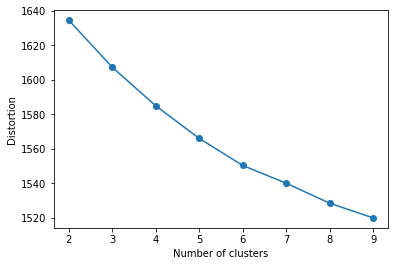

In [11]:
# # Listing 4-45 (cont.)


import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

plt.plot(range(2,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [29]:
# Listing 4-46

from sklearn.cluster import AgglomerativeClustering

cluster_list = range(2,10)
def get_optimum_ag_clusters(input_array, cluster_list):
    return_list = []
    for cluster_n in cluster_list:
        temp_dict = {}
        AG = AgglomerativeClustering(n_clusters=cluster_n, affinity='euclidean', memory=None, connectivity=None, compute_full_tree=True, linkage='ward', pooling_func='deprecated')
        pred_labels = AG.fit_predict(input_array)
        valcount_series = pd.Series(pred_labels).value_counts()
        temp_dict["cluster_n"] = cluster_n
        temp_dict["cluster_values"] = valcount_series.tolist()
        return_list.append(temp_dict)
    return return_list

return_list = get_optimum_ag_clusters(X_train_text.toarray(), cluster_list)
            


In [30]:
return_list

[{'cluster_n': 2, 'cluster_values': [1378, 402]},
 {'cluster_n': 3, 'cluster_values': [1198, 402, 180]},
 {'cluster_n': 4, 'cluster_values': [1042, 402, 180, 156]},
 {'cluster_n': 5, 'cluster_values': [652, 402, 390, 180, 156]},
 {'cluster_n': 6, 'cluster_values': [402, 390, 354, 298, 180, 156]},
 {'cluster_n': 7, 'cluster_values': [390, 354, 298, 291, 180, 156, 111]},
 {'cluster_n': 8, 'cluster_values': [390, 354, 298, 180, 174, 156, 117, 111]},
 {'cluster_n': 9,
  'cluster_values': [390, 354, 298, 174, 156, 134, 117, 111, 46]}]

In [39]:
# Listing 4-47

cluster_labels = []
for items in return_list:
    cluster_labels.append(items["cluster_n"])

for values in return_list:
    
    sum_value = sum(values["cluster_values"])
    for cluster_num in values["cluster_values"]:
        if 0.05 > cluster_num/sum_value or cluster_num/sum_value > 0.5:
            if values["cluster_n"] in cluster_labels:
                cluster_labels.remove(values["cluster_n"])
        
print(cluster_labels)

[5, 7, 8]


In [40]:
# Listing 4-48

from sklearn.cluster import AgglomerativeClustering

AG = AgglomerativeClustering(n_clusters=7, affinity='euclidean', memory=None, connectivity=None, compute_full_tree=True, linkage='ward', pooling_func='deprecated')
pred_labels = AG.fit_predict(X_train_text.toarray())

In [15]:
# in case you ran km clustering before this and still have a column with cluster_name
df_dtm = df_dtm.drop(columns = 'cluster_name')


In [16]:
# Listing 4-48 (cont.)

df_dtm["cluster_name"] = pred_labels
df_dtm.head()

cluster_list = len(df_dtm['cluster_name'].unique())
for cluster_number in range(cluster_list):
    print("*"*20)
    print("Cluster %d: " % cluster_number)
    df_cl = df_dtm[df_dtm['cluster_name'] == cluster_number]
    df_cl = df_cl.drop(columns = 'cluster_name')
    print("Total documents in cluster: ", len(df_cl))
    print()
    df_sum = df_cl.agg(['sum'])
    df_sum = df_sum.transpose()
    df_sum_transpose_sort_descending= df_sum.sort_values(by = 'sum', ascending = False)
    df_sum_transpose_sort_descending.index.name = 'words'
    df_sum_transpose_sort_descending.reset_index(inplace=True)
    print(','.join(df_sum_transpose_sort_descending.words.iloc[:30].tolist()))

********************
Cluster 0: 
Total documents in cluster:  291

club,said,win,game,united,champion,cup,year,match,play,season,team,final,world,open,time,olympic,old,year old,league,players,won,good,second,injury,set,football,player,just,goal
********************
Cluster 1: 
Total documents in cluster:  298

people,said,technology,software,mobile,users,games,computer,microsoft,phone,broadband,digital,use,game,net,mr,video,new,data,online,phones,security,information,using,service,internet,mail,used,web,content
********************
Cluster 2: 
Total documents in cluster:  180

mr,labour,election,party,blair,said,brown,mr blair,mr brown,howard,tax,government,chancellor,minister,prime,prime minister,lord,tory,leader,people,campaign,tories,tony blair,tony,britain,general,general election,public,vote,plans
********************
Cluster 3: 
Total documents in cluster:  156

film,best,award,awards,films,actor,oscar,director,won,actress,year,number,comedy,said,prize,star,movie,hollywood,britis

# Text Classification


In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("bbc_news_data.csv")
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print("Train df shape is: ",train.shape)
print("Test df shape is: ",test.shape)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer(stop_words='english', 
                                   ngram_range=(1, 2),max_df=0.97, min_df = 0.03, lowercase=True, max_features=2500)

X_train_text = tfidf_transformer.fit_transform(train['text'])
X_test_text = tfidf_transformer.transform(test["text"])
df_dtm = pd.DataFrame(X_train_text.toarray(), columns=tfidf_transformer.get_feature_names())
df_dtm.head()

Train df shape is:  (1780, 4)
Test df shape is:  (445, 4)


,000,000 people,10,100,11,12,13,14,15,16,...,worldwide,worth,written,wrong,year,year old,years,years ago,york,young
0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.135097,0.000000,0.000000,0.0,0.049214,0.0,0.000000,0.0,0.000000,0.0
1,0.078735,0.1411,0.083028,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.064908,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.056240,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.039721,0.0,...,0.000000,0.000000,0.000000,0.0,0.036147,0.0,0.024598,0.0,0.000000,0.0
3,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.081923,0.0000,0.000000,0.0,0.0,0.0,0.062596,0.0,0.000000,0.0,...,0.000000,0.000000,0.070703,0.0,0.026327,0.0,0.000000,0.0,0.061851,0.0


In [11]:
# Listing 4-49
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def print_classifier_scores(train, test, pred_train, pred_test):
    print("Train data accuracy score: ", accuracy_score(train["label"],pred_train))
    print("Test data accuracy score: ", accuracy_score(test["label"],pred_test))

    print("Recall score on train data: ", recall_score(train["label"],pred_train, average='macro'))
    print("Recall score on test data: ", recall_score(test["label"],pred_test, average='macro'))

    print("Precision score on train data: ",precision_score(train["label"],pred_train, average='macro'))
    print("Precision score on test data: ",precision_score(test["label"],pred_test, average='macro'))

    print("F1 score on train data: ", f1_score(train["label"],pred_train, average='macro'))
    print("F1 score on test data: ", f1_score(test["label"],pred_test, average='macro'))

In [17]:
# Listing 4-50
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

import numpy as np
import pandas as pd
df = pd.read_csv("bbc_news_data.csv")
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print("Train df shape is: ",train.shape)
print("Test df shape is: ",test.shape)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer(stop_words='english', 
                                   ngram_range=(1, 2),max_df=0.97, min_df = 0.03, lowercase=True, max_features=2500)

X_train_text = tfidf_transformer.fit_transform(train['text'])
X_test_text = tfidf_transformer.transform(test["text"])
df_dtm = pd.DataFrame(X_train_text.toarray(), columns=tfidf_transformer.get_feature_names())


print("Multinomial naive bayes classifier\n")
mnb = MultinomialNB()
train_start_time = time.time()
mnb.fit(X_train_text, train["label"])
train_end_time = time.time()
print("total time (in milliseconds) to train: ", round(1000*(train_end_time - train_start_time),3))
pred_train_start_time = time.time()
pred_train = mnb.predict(X_train_text)
pred_train_end_time = time.time()
print("total time (in milliseconds) to predict labels on train data: ", round(1000*(pred_train_end_time - pred_train_start_time), 3))
pred_test_start_time = time.time()
pred_test = mnb.predict(X_test_text)
pred_test_end_time = time.time()
print("total time (in milliseconds) to predict labels on test data: ", round(1000*(pred_test_end_time - pred_test_start_time),3))
print_classifier_scores(train, test, pred_train, pred_test)
print("*"*20)

print("Complement Naive Bayes\n")
    
cnb = ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)
train_start_time = time.time()
cnb.fit(X_train_text, train["label"])
train_end_time = time.time()
print("total time (in milliseconds) to train: ", round(1000*(train_end_time - train_start_time),3))
pred_train_start_time = time.time()
pred_train = cnb.predict(X_train_text)
pred_train_end_time = time.time()
print("total time (in milliseconds) to predict labels on train data: ", round(1000*(pred_train_end_time - pred_train_start_time), 3))
pred_test_start_time = time.time()
pred_test = cnb.predict(X_test_text)
pred_test_end_time = time.time()
print("total time (in milliseconds) to predict labels on test data: ", round(1000*(pred_test_end_time - pred_test_start_time),3))
print_classifier_scores(train, test, pred_train, pred_test)
print("*"*20)


Multinomial naive bayes classifier

total time (in milliseconds) to train:  7.02
total time (in milliseconds) to predict labels on train data:  1.002
total time (in milliseconds) to predict labels on test data:  1.055
Train data accuracy score:  0.9707865168539326
Test data accuracy score:  0.9662921348314607
Recall score on train data:  0.9697859913718123
Recall score on test data:  0.9659067173646726
Precision score on train data:  0.9698213452080875
Precision score on test data:  0.9663648248470785
F1 score on train data:  0.9697642938439637
F1 score on test data:  0.96608690414534
********************
Complement Naive Bayes

total time (in milliseconds) to train:  6.523
total time (in milliseconds) to predict labels on train data:  1.003
total time (in milliseconds) to predict labels on test data:  1.003
Train data accuracy score:  0.9668539325842697
Test data accuracy score:  0.9640449438202248
Recall score on train data:  0.9654591117837386
Recall score on test data:  0.962606575

In [18]:
# Listing 4-51
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

print("Logistic Regression\n")
logit = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')

train_start_time = time.time()
logit.fit(X_train_text, train["label"])
train_end_time = time.time()
print("total time (in milliseconds) to train: ", round(1000*(train_end_time - train_start_time),3))
pred_train_start_time = time.time()
pred_train = logit.predict(X_train_text)
pred_train_end_time = time.time()
print("total time (in milliseconds) to predict labels on train data: ", round(1000*(pred_train_end_time - pred_train_start_time), 3))
pred_test_start_time = time.time()
pred_test = logit.predict(X_test_text)
pred_test_end_time = time.time()
print("total time (in milliseconds) to predict labels on test data: ", round(1000*(pred_test_end_time - pred_test_start_time),3))
print_classifier_scores(train, test, pred_train, pred_test)
print("*"*20)

print("Gradient Boosting Classifier\n")
gbc = GradientBoostingClassifier()

train_start_time = time.time()
gbc.fit(X_train_text, train["label"])
train_end_time = time.time()
print("total time (in milliseconds) to train: ", round(1000*(train_end_time - train_start_time),3))
pred_train_start_time = time.time()
pred_train = gbc.predict(X_train_text)
pred_train_end_time = time.time()
print("total time (in milliseconds) to predict labels on train data: ", round(1000*(pred_train_end_time - pred_train_start_time), 3))
pred_test_start_time = time.time()
pred_test = gbc.predict(X_test_text)
pred_test_end_time = time.time()
print("total time (in milliseconds) to predict labels on test data: ", round(1000*(pred_test_end_time - pred_test_start_time),3))
print_classifier_scores(train, test, pred_train, pred_test)
print("*"*20)

Logistic Regression

total time (in milliseconds) to train:  168.812
total time (in milliseconds) to predict labels on train data:  1.504
total time (in milliseconds) to predict labels on test data:  1.002
Train data accuracy score:  0.9921348314606742
Test data accuracy score:  0.9707865168539326
Recall score on train data:  0.9922924712103816
Recall score on test data:  0.9693296745020883
Precision score on train data:  0.991755245019527
Precision score on test data:  0.9710673581663698
F1 score on train data:  0.9920061720158057
F1 score on test data:  0.9701367409349061
********************
Gradient Boosting Classifier

total time (in milliseconds) to train:  13858.448
total time (in milliseconds) to predict labels on train data:  17.868
total time (in milliseconds) to predict labels on test data:  5.529
Train data accuracy score:  1.0
Test data accuracy score:  0.9370786516853933
Recall score on train data:  1.0
Recall score on test data:  0.9350859510448137
Precision score on tra

# Packaging models

In [19]:
# Listing 4-52

import joblib

joblib.dump(tfidf_transformer, 'tfidfvectorizer.pkl')
joblib.dump(cnb, 'cnbclassifier.pkl')

['cnbclassifier.pkl']

In [25]:
tfidf_pretrained_vectorizer = joblib.load('tfidfvectorizer.pkl')
cnb_pretrained_model = joblib.load('cnbclassifier.pkl')

In [26]:
# Listing 4-53

tfidf_pretrained_vectorizer = joblib.load('tfidfvectorizer.pkl')
cnb_pretrained_model = joblib.load('cnbclassifier.pkl')
X_test = tfidf_pretrained_vectorizer.transform(test['text'])
X_train = tfidf_pretrained_vectorizer.transform(train['text'])
pred_test = cnb_pretrained_model.predict(X_test)
pred_train = cnb_pretrained_model.predict(X_train)
print_classifier_scores(train, test, pred_train, pred_test)

Train data accuracy score:  0.9668539325842697
Test data accuracy score:  0.9640449438202248
Recall score on train data:  0.9654591117837386
Recall score on test data:  0.962606575117162
Precision score on train data:  0.9668281855196993
Precision score on test data:  0.9642158869040557
F1 score on train data:  0.9660095290612176
F1 score on test data:  0.9632802428324068
